# Final Project - Introduction to Data Science

**Team members:**

1. Nguyễn Hoàng Trung Kiên (Leader) - 22127478

2. Quách Trần Quán Vinh - 22127460

3. Ngô Hải Bằng - 22127460

### Import libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import dataset

In [123]:
df = pd.read_csv('houses_for_exploring.csv')
df

,Price,Type,Status,Land Size,Building Size,Architecture Style,County,Provider,Bedrooms,Bathrooms
0,2200.0,House,Active,668.44,136.20,Other,Mohave,"Black Mountain Valley Realty, Inc",3.0,2.0
1,3000.0,Apartment,Active,161.87,205.13,Other,PHILADELPHIA,Compass,2.0,3.0
2,1195.0,Apartment,Active,768.90,133.04,Other,PHILADELPHIA,OCF Realty,1.0,1.0
3,8000.0,Townhouse,Active,728.43,213.68,Other,Ventura,eXp Realty of California Inc.,4.0,3.0
4,5600.0,House,Active,849.84,266.72,Colonial,FAIRFAX,Keller Williams Fairfax Gateway,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
3767,2050.0,Other,Active,566.56,175.03,Contemporary,Maricopa,Realty ONE Group,3.0,2.0
3768,1300.0,Other,Active,930.78,104.98,Ranch,Maricopa,Real Living SJ Fowler Real Estate,2.0,1.0
3769,3499.0,Other,Active,890.31,345.79,Contemporary,Maricopa,HomeSmart,4.0,3.0
3770,10900.0,Other,Active,1254.53,653.94,Other,Maricopa,Russ Lyon Sotheby's International Realty,5.0,7.0


# Make questions and answer

## 1. What is the relationship between price and number of rooms for townhouse type?

**Benefit**: help to understand how the price of a townhouse is influenced by the number of rooms, providing insights into pricing trends and space-value relationships.

- Extract the records that have ```Type``` is townhouse and calculate total rooms of each record by summing ```Bedrooms``` and ```Bathrooms```

In [124]:
df_rooms = df[df['Type'] == 'Townhouse']
df_rooms = df_rooms[['Price', 'Bedrooms', 'Bathrooms']].copy()
df_rooms['Rooms'] = df['Bedrooms'] + df['Bathrooms']

- Visualize the scatter plot of ```Price``` and ```Rooms```

Text(0.5, 1.0, 'Price vs. Rooms for townhouse type')

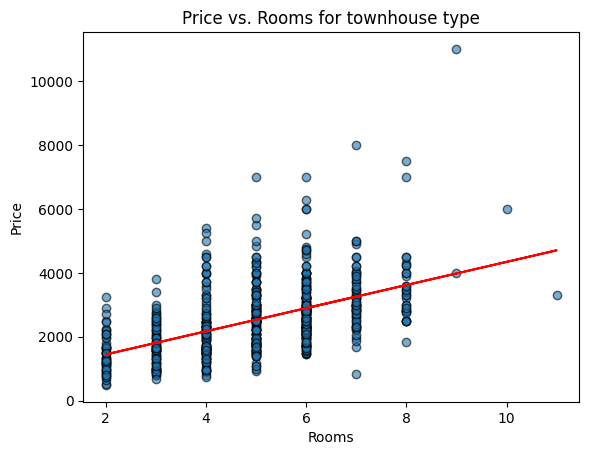

In [125]:
x = df_rooms['Rooms']
y = df_rooms['Price']
plt.scatter(x, y, alpha=0.6, edgecolors='k')
slope, intercept = np.polyfit(x, y, 1)  
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price vs. Rooms for townhouse type')

- Check for the correlation between ```Price``` and ```Rooms```

In [126]:
correlation = df_rooms['Price'].corr(df_rooms['Rooms'])
print(f"Correlation between Price and Rooms: {correlation}")

Correlation between Price and Rooms: 0.5113606895195971


### Comments

- From the scatter plot and correlation of ```Price``` and ```Room``` of ```Type``` townhouse, we can clearly see that they have a moderate relationship to each other ($corr = 0.51$).
- This indicates that an increase in the number of rooms is moderately associated with a rise in ```Price``` for townhouses in most cases. However, other factors may also influence the price, as the correlation is not really strong.

## 2. Which type of property has the highest average price?

**Benefit**: identify the property type with the highest average price, helping to determine which property category is considered more valuable in the dataset.

- Calculate the mean of ```Price``` grouped by ```Type```

In [127]:
avg_price_by_property = df.groupby('Type')['Price'].mean()
print("Average price by property type:")
print(avg_price_by_property.sort_values(ascending=False))

Average price by property type:
Type
Other           6303.178457
Rural           5250.000000
House           3895.576094
Apartment       2616.219081
Townhouse       2525.646360
Multi family    1205.000000
Name: Price, dtype: float64


### Comments

- The average price by property type shows that Other has the highest average price (6303.18), followed by Rural (5250.00) and House (3895.58). Apartment (2616.22) and Townhouse (2525.65) are more affordable, while Multi-family has the lowest average price at 1205.00. 

- This suggests that larger properties like houses tend to have higher prices, while smaller, multi-unit properties are generally more affordable.

## 3.  How does building size affect price in the 10 counties with the most occurrences in the dataset?

**Benefit**:  explores how building size influences price in the most frequently represented counties, offering insights into regional pricing trends and the impact of property size on value.

- Identify top 10 counties

In [128]:
county_counts = df['County'].value_counts()
top_10_counties = county_counts.head(10).index.tolist()
top_10_counties

['PHILADELPHIA',
 'Los Angeles',
 'Miami-Dade',
 'Palm Beach',
 'Cook',
 'Orange',
 'Dallas',
 'Tarrant',
 'Maricopa',
 'Clark']

- Filter the data by ```County```

In [129]:
filtered_df = df[df['County'].isin(top_10_counties)]
filtered_df

,Price,Type,Status,Land Size,Building Size,Architecture Style,County,Provider,Bedrooms,Bathrooms
1,3000.0,Apartment,Active,161.87,205.13,Other,PHILADELPHIA,Compass,2.0,3.0
2,1195.0,Apartment,Active,768.90,133.04,Other,PHILADELPHIA,OCF Realty,1.0,1.0
7,1925.0,Apartment,Active,971.25,77.11,Other,PHILADELPHIA,National Realty Old City LLC,1.0,1.0
8,3500.0,Townhouse,Active,242.81,106.84,Rambler,PHILADELPHIA,"RE/MAX Properties, Ltd.",3.0,3.0
9,1695.0,Apartment,Active,566.56,51.19,Other,PHILADELPHIA,JG Real Estate,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3767,2050.0,Other,Active,566.56,175.03,Contemporary,Maricopa,Realty ONE Group,3.0,2.0
3768,1300.0,Other,Active,930.78,104.98,Ranch,Maricopa,Real Living SJ Fowler Real Estate,2.0,1.0
3769,3499.0,Other,Active,890.31,345.79,Contemporary,Maricopa,HomeSmart,4.0,3.0
3770,10900.0,Other,Active,1254.53,653.94,Other,Maricopa,Russ Lyon Sotheby's International Realty,5.0,7.0


- Visualize the scatter plot of ```Building Size``` and ```Price```

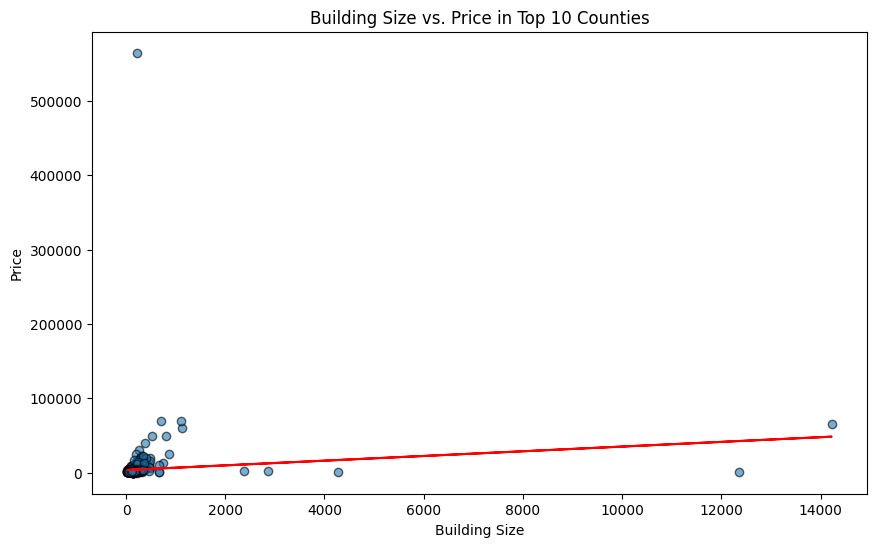

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Building Size'], filtered_df['Price'], alpha=0.6, edgecolors='k')

x = filtered_df['Building Size']
y = filtered_df['Price']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red')

plt.xlabel("Building Size")
plt.ylabel("Price")
plt.title("Building Size vs. Price in Top 10 Counties")
plt.show()

- Check for the correlation between ```Building Size``` and ```Price```

In [131]:
correlation = filtered_df['Price'].corr(filtered_df['Building Size'])
print(f"Correlation between Price and Rooms: {correlation}")

Correlation between Price and Rooms: 0.10535608411990785


### Comments

- From the scatter plot and correlation of ```Price``` and ```Building Size``` of top 10 ```County```, we can clearly see that they have a weak relationship to each other ($corr = 0.1$).
- This indicates that in low cases an increase in the number ofbuilding size is weakly associated with a rise in ```Price``` among these countíe. Other factors may also influence the price, as the correlation is not strong.

## 4. Are there any price differences between different types of properties?

**Benefit**: identify if price varies significantly across different property types, providing insights into market segmentation and pricing strategies.

- Group the ```Price``` by ```Type```

In [132]:
df_price_by_types = df.groupby('Type')['Price']
types = df['Type'].unique()

- Visualize histograms for each ```Type```

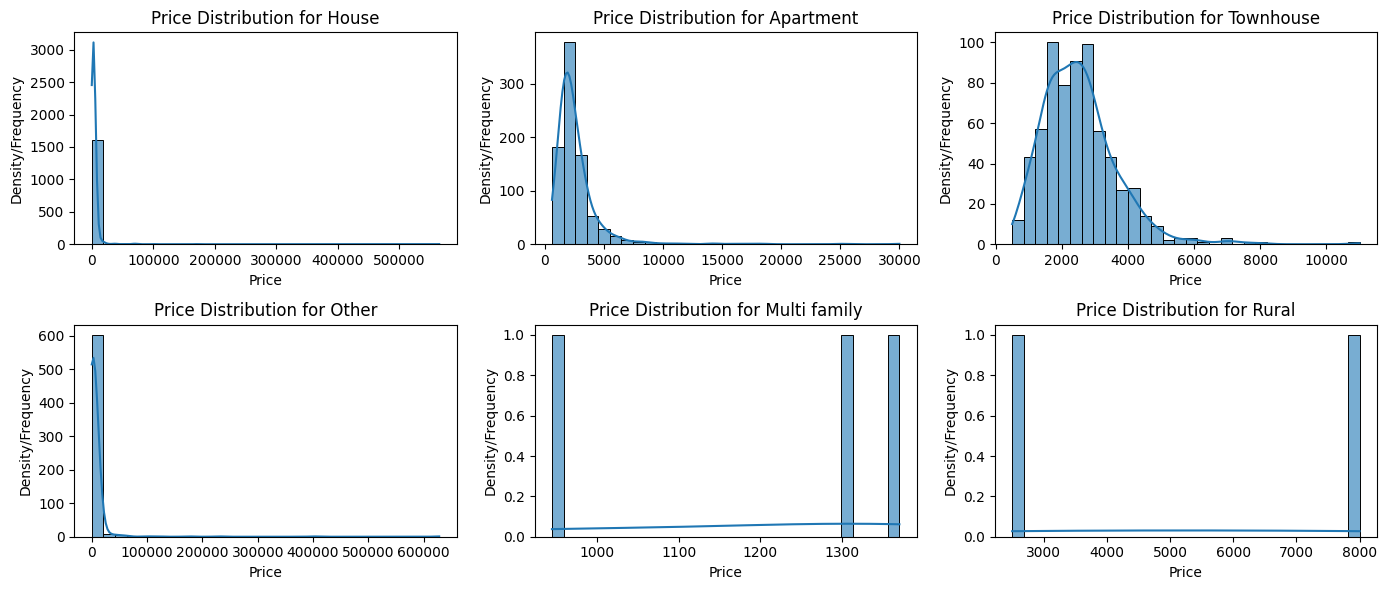

In [133]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 6))
axes = axes.flatten()
for i, type_ in enumerate(types):
    prices = df[df['Type'] == type_]['Price']
    sns.histplot(prices, kde=True, bins=30, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Price Distribution for {type_}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Density/Frequency')

plt.tight_layout()
plt.show()

### Comments

- Through the histograms, the range of ```Price``` is varies across different types.

- House and Other type has the widest range of ```Price```. Apartment has wide range also although the range is not varies as House. $\rightarrow$ This indicates that the types of house that have high popularity will have many different price points, while less popular types may have a more concentrated price range.

## 5. Which provider tends to offer wider range of properties?

**Benefit**: determine which provider offers a more diverse selection of properties, indicating their market reach and ability to cater to various customer preferences.

- Count the number of distinct ```Type``` occur in the dataset

In [134]:
df['Type'].nunique()

6

- All of ```Type``` in dataset

In [135]:
df['Type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Other', 'Multi family',
       'Rural'], dtype=object)

- Identify provider with wide range of properties sort by number of distinct ```Type```

In [136]:
provider_property_range = df.groupby('Provider')['Type'].nunique()
provider_property_range = provider_property_range.sort_values(ascending=False)
max_value = provider_property_range.max()
print(provider_property_range[provider_property_range == max_value])

Provider
Charles Rutenberg Realty, Inc.    4
Charles Rutenberg Realty, Inc     4
eXp Realty                        4
eXp Realty, LLC                   4
Maxwell Realty Company Inc        4
LPT Realty LLC                    4
LoKation Real Estate              4
Keyes Company Realtors            4
LPT Realty, LLC.                  4
Keller Williams Main Line         4
Keller Williams Realty            4
Carnegie Real Estate LLC          4
Compass                           4
Real Broker, LLC                  4
Name: Type, dtype: int64


From the result above, there are some providers that have the same name to each other, but they are distinguished by comma or dot, this is due to syntax problems when crawling data, and earlier preprocess methods haven't supported this.

But **LLC** seems to occur frequently in the list. Based on my knowledge of the data, **LLC** is Limited Liability Company. It is a type of business structure commonly used in many countries, including the United States that combines the flexibility and simplicity of a partnership with the liability protection of a corporation.

$\rightarrow$ We will explore **LLC**'s range of properties.

- Identify **LLC**'s range of properties

In [137]:
df_llc = df[df['Provider'].str.contains('LLC', case=False, na=False)]
provider_property_range_llc = df_llc.groupby('Provider')['Type'].nunique()
max_distinct_types_llc = provider_property_range_llc.max()
print(f"Total distinct property types for LLC providers: {max_distinct_types_llc}")

Total distinct property types for LLC providers: 4


- Properties that was provided by **LLC**

In [138]:
df_llc['Type'].unique()

array(['Apartment', 'Townhouse', 'House', 'Other'], dtype=object)

So **LLC** mainly provides Apartment, Townhouse and House.

### Comments

- Most of the providers that have wide range of properties have the max range of properties is 4. Comparing to the range of properties of the dataset is 6, there are no individual providers that cover all the properties.
$\rightarrow$ This indicates that the providers tend to offer specific types of house ,rather than a full variety of property types. This specialization could be driven by market demand, business strategy, or resource limitations, leading providers to focus on particular property segments.

- For **LLC**, it still has the max number of type is 4. That are Apartment, Townhouse, House. LLCs can provide a wide range of house types because they offer operational flexibility and limited liability protection, allowing them to invest in diverse properties while minimizing personal risk.